In [1]:
#1
#setting up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Data important
diabetes = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv', index_col= None)
diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [2]:
#predict whether a patient is likely to not be readmit in the hospital within 30 days. (No = readamit)
#Filter by 30 days
#Filter by readmittance/ DiabetesMed
#Race or Gender
#Age

In [3]:
#dropping any unnecessary columns
diabetes2 = diabetes.drop(['insulin','encounter_id','weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'num_lab_procedures', 'medical_specialty', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone'], axis=1)
diabetes2

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),3,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),5,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),10,Ch,Yes,NO


In [4]:
#sorting values by time in hospital
diabetes_time = diabetes2.sort_values(by=['time_in_hospital'], ascending=True)
diabetes_time

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,No,No,NO
71953,83972763,AfricanAmerican,Male,[50-60),1,No,No,>30
71956,44132427,Caucasian,Male,[60-70),1,No,No,NO
71960,113373018,Caucasian,Female,[70-80),1,No,No,>30
71967,110301687,Caucasian,Male,[50-60),1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...
86491,86384655,AfricanAmerican,Male,[40-50),14,Ch,Yes,NO
22855,106097238,Hispanic,Female,[90-100),14,No,No,>30
6499,108507015,Caucasian,Male,[70-80),14,Ch,Yes,NO
6522,25969788,Caucasian,Male,[60-70),14,No,Yes,NO


In [5]:
#getting the time=1 only
diabetes_timept2 = diabetes_time[diabetes_time.time_in_hospital == 1]
diabetes_timept2

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,No,No,NO
71953,83972763,AfricanAmerican,Male,[50-60),1,No,No,>30
71956,44132427,Caucasian,Male,[60-70),1,No,No,NO
71960,113373018,Caucasian,Female,[70-80),1,No,No,>30
71967,110301687,Caucasian,Male,[50-60),1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...
9805,24136200,Caucasian,Male,[30-40),1,No,Yes,<30
10405,682614,Caucasian,Male,[80-90),1,No,No,NO
87672,42643233,Caucasian,Male,[70-80),1,Ch,Yes,<30
9994,93364677,Caucasian,Female,[60-70),1,No,No,NO


In [19]:
#getting the list of people who have readmitted
diabetes_readmitted = diabetes_timept2.sort_values(by=['readmitted'], ascending=True)
diabetes_readmitted

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
45079,56141649,Caucasian,Female,[60-70),1,No,Yes,<30
54852,42941232,Caucasian,Male,[70-80),1,No,No,<30
64498,91314108,Caucasian,Female,[50-60),1,No,Yes,<30
54844,51231447,Caucasian,Female,[70-80),1,Ch,Yes,<30
81645,45494154,Caucasian,Male,[60-70),1,Ch,Yes,<30
...,...,...,...,...,...,...,...,...
37884,8461413,Caucasian,Male,[70-80),1,No,Yes,NO
37873,24890679,Caucasian,Male,[70-80),1,Ch,Yes,NO
48234,25176357,Caucasian,Male,[60-70),1,No,No,NO
48316,65292111,Caucasian,Female,[70-80),1,No,No,NO


In [20]:
#getting the number of people who did not readmit
diabetes_notreadmitted = diabetes_readmitted[diabetes_readmitted['readmitted'] == 'NO']
len(diabetes_notreadmitted)

8575

In [22]:
diabetes_notreadmitted = diabetes_readmitted[diabetes_readmitted['readmitted'] == 'NO']
print (diabetes_notreadmitted)

       patient_nbr             race  gender  ... change  diabetesMed readmitted
54816    112873185        Caucasian  Female  ...     Ch          Yes         NO
57946    102871845  AfricanAmerican  Female  ...     No           No         NO
28655     25602372        Caucasian    Male  ...     No           No         NO
34371     23507280        Caucasian    Male  ...     No           No         NO
52963     77720535        Caucasian    Male  ...     Ch          Yes         NO
...            ...              ...     ...  ...    ...          ...        ...
37884      8461413        Caucasian    Male  ...     No          Yes         NO
37873     24890679        Caucasian    Male  ...     Ch          Yes         NO
48234     25176357        Caucasian    Male  ...     No           No         NO
48316     65292111        Caucasian  Female  ...     No           No         NO
88373     77442687  AfricanAmerican    Male  ...     Ch          Yes         NO

[8575 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


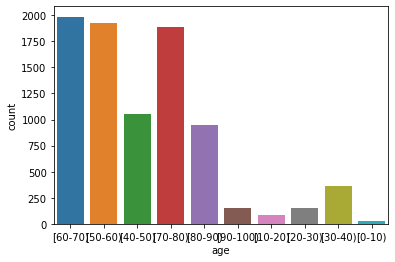

In [23]:
sns.countplot(diabetes_notreadmitted['age'], label = 'Count')

In [24]:
diabetes_final = diabetes_notreadmitted[diabetes_notreadmitted.diabetesMed == 'Yes']
diabetes_final

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
54816,112873185,Caucasian,Female,[60-70),1,Ch,Yes,NO
52963,77720535,Caucasian,Male,[50-60),1,Ch,Yes,NO
58125,92925756,Caucasian,Male,[50-60),1,Ch,Yes,NO
58121,111873447,Caucasian,Female,[70-80),1,Ch,Yes,NO
58038,56429127,Caucasian,Male,[50-60),1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...
37839,24009093,AfricanAmerican,Male,[20-30),1,Ch,Yes,NO
48274,23250051,AfricanAmerican,Female,[40-50),1,Ch,Yes,NO
37884,8461413,Caucasian,Male,[70-80),1,No,Yes,NO
37873,24890679,Caucasian,Male,[70-80),1,Ch,Yes,NO


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


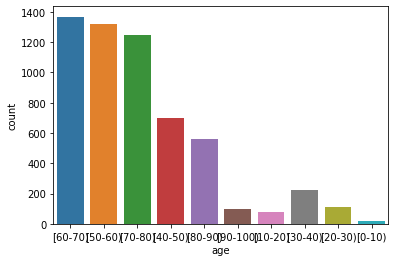

In [11]:
sns.countplot(diabetes_final['age'], label = 'Count') 
#People of different ages who take diabetes medication and have been in the hopsital for 1 day
#Most importantly these people have NOT returned to the hospital

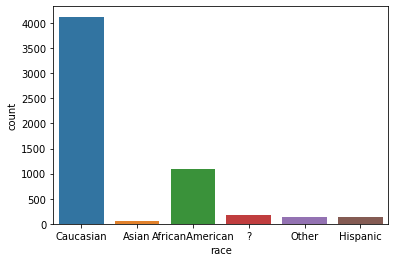

In [12]:
sns.countplot (x='race', data=diabetes_final)

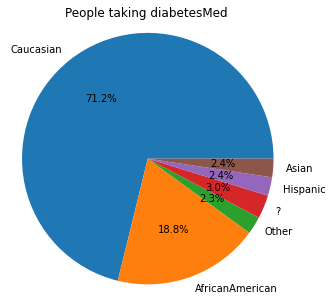

In [13]:
plt.figure(figsize = (5,5))
Caucasian = diabetes_final[diabetes_final['race'] == "Caucasian"]
CaucasianTotal = len(Caucasian['diabetesMed'])
AfricanAmerican = diabetes_final[diabetes_final['race'] == "AfricanAmerican"]
AfricanAmericanTotal = len(AfricanAmerican['diabetesMed'])
Other = diabetes_final[diabetes_final['race'] == "Other"]
OtherTotal = len(Other['diabetesMed'])
QuestionMark = diabetes_final[diabetes_final['race'] == "?"]
QuestionMarkTotal = len(QuestionMark['diabetesMed'])
Hispanic = diabetes_final[diabetes_final['race'] == "Hispanic"]
HispanicTotal = len(Hispanic['diabetesMed'])
Asian = diabetes_final[diabetes_final['race'] == "Hispanic"]
AsianTotal = len(Asian['diabetesMed'])

my_data = [CaucasianTotal,AfricanAmericanTotal,OtherTotal,QuestionMarkTotal,HispanicTotal,AsianTotal]
my_labels = 'Caucasian','AfricanAmerican','Other','?','Hispanic','Asian'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('People taking diabetesMed')
plt.axis('equal')
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
diabetes_final_countvectorizer=vectorizer.fit_transform(diabetes_final['race'])

In [15]:
diabetes_final_countvectorizer.shape

(5714, 5)

In [16]:
type(diabetes_final_countvectorizer)

scipy.sparse.csr.csr_matrix

In [17]:
print(vectorizer.get_feature_names())

['africanamerican', 'asian', 'caucasian', 'hispanic', 'other']


In [18]:
print(diabetes_final_countvectorizer.toarray())

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


In [26]:
diabetes = diabetes.copy()
patient_data_clean = diabetes.replace('?',np.NaN)
patient_data_missing_values = diabetes.isnull().sum()
patient_data_missing_values

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [28]:
patient_data_ml= patient_data_clean.drop(['weight','payer_code','medical_specialty'],axis=1)
patient_data_ml.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
patient_data_ml['30DayReadmit'] = np.where(patient_data_ml['readmitted'] == 'NO', 0, 1)
patient_data_ml.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30DayReadmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#Normalization of the data,
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

normal = StandardScaler()

patient_data_ml[listnormal] = normal.fit_transform(patient_data_ml[listnormal])

patient_data_ml.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30DayReadmit
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,2.357310e-14,3.243938e-16,4.233273e-15,-2.183720e-14,1.000822e-13,2.509265e-14,-4.314501e-14,1.284175e-13,0.460881
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.498470
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,-1.137649e+00,-2.139630e+00,-7.853977e-01,-1.848268e+00,-2.914615e-01,-2.126202e-01,-5.032762e-01,-3.321596e+00,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,-8.026506e-01,-6.147950e-01,-7.853977e-01,-7.409197e-01,-2.914615e-01,-2.126202e-01,-5.032762e-01,-7.357332e-01,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,-1.326548e-01,4.596660e-02,-1.991621e-01,-1.257264e-01,-2.914615e-01,-2.126202e-01,-5.032762e-01,2.986119e-01,0.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,5.373411e-01,7.067282e-01,3.870736e-01,4.894670e-01,-2.914615e-01,-2.126202e-01,2.885790e-01,8.157845e-01,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,3.217324e+00,4.518815e+00,2.732016e+00,7.994826e+00,3.285094e+01,8.146673e+01,1.612568e+01,4.435992e+00,1.000000


In [32]:
Y = patient_data_ml['30DayReadmit']
X = patient_data_ml.drop(['30DayReadmit'], axis =1)
X = pd.get_dummies(X)

In [37]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 8, stratify = Y)

In [38]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (81412, 2370) (20354, 2370)


In [39]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [40]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.5684386361403164
